In [10]:
import openai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re


In [11]:

# 🎯 CONFIGURACIÓN DE OPENAI PARA LM STUDIO LOCAL
openai.api_key = "not-needed"
openai.api_base = "http://localhost:1234/v1"  # Asegurate de que este sea el puerto correcto


In [12]:
class AgenteAnalistaInteractivo:
    def __init__(self, path_csv, modelo="mistral"):
        self.modelo = modelo
        self.df = pd.read_csv(path_csv)
        print("✅ CSV cargado con éxito.")
        print("📊 Columnas detectadas:")
        print(self.df.dtypes)

    def responder_y_ejecutar(self, pregunta_usuario):
        inicio = time.time()

        esquema = str(self.df.dtypes)

        prompt = f"""
Sos un analista de datos experto en Python. Un usuario te hará preguntas sobre un DataFrame con las siguientes columnas y tipos de datos:

{esquema}

Tu tarea es generar código en Python (usando pandas, matplotlib o seaborn) para responder la consulta del usuario. 
No expliques, solo devolvé el código dentro de un bloque de triple backtick (```python ... ```).
        """

        response = openai.ChatCompletion.create(
            model=self.modelo,
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": pregunta_usuario}
            ]
        )

        duracion = time.time() - inicio
        contenido = response.choices[0].message["content"]

        print(f"\n⏱ Tiempo de respuesta: {duracion:.2f} segundos")

        # Extraer código entre triple backtick
        match = re.search(r"```python\n(.*?)```", contenido, re.DOTALL)
        if match:
            codigo = match.group(1)
            print("\n🧠 Código generado:")
            print(codigo)
            try:
                entorno = {"df": self.df, "plt": plt, "sns": sns, "pd": pd}
                exec(codigo, entorno)
            except Exception as e:
                print(f"\n❌ Error al ejecutar el código: {e}")
        else:
            print("⚠️ No se encontró código Python válido en la respuesta.")


✅ CSV cargado con éxito.
📊 Columnas detectadas:
Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object

⏱ Tiempo de respuesta: 2.18 segundos

🧠 Código generado:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con las columnas mencionadas
plt.figure(figsize=(10, 6))
df['Region'].value_counts().plot(kind='bar')
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Número de Ventas')
plt.show()



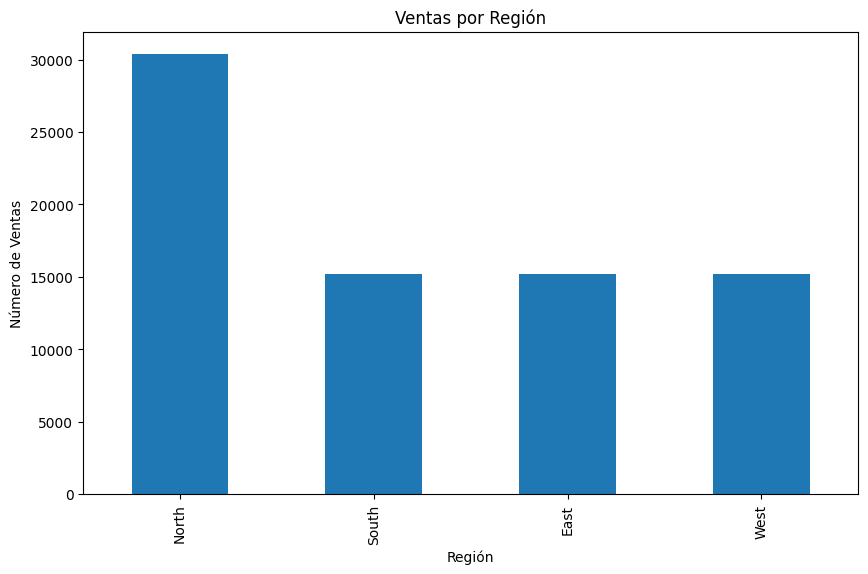

In [14]:
agente = AgenteAnalistaInteractivo("sales_data.csv")
agente.responder_y_ejecutar("¿Podés mostrar un gráfico de barras con las ventas por región?")



⏱ Tiempo de respuesta: 3.30 segundos

🧠 Código generado:
import pandas as pd

# Supongamos que el DataFrame se llama df y ya ha sido cargado.
# Convertir la columna 'Date' al formato de fecha si no lo está ya.
df['Date'] = pd.to_datetime(df['Date'])

# Crear una nueva columna con el mes y el año de la fecha.
df['Month-Year'] = df['Date'].dt.to_period('M')

# Agrupar por el mes y año, luego sumar las ventas.
monthly_sales = df.groupby('Month-Year')['Units Sold'].sum()

# Graficar las ventas mensuales.
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month-Year')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Variation')
plt.show()



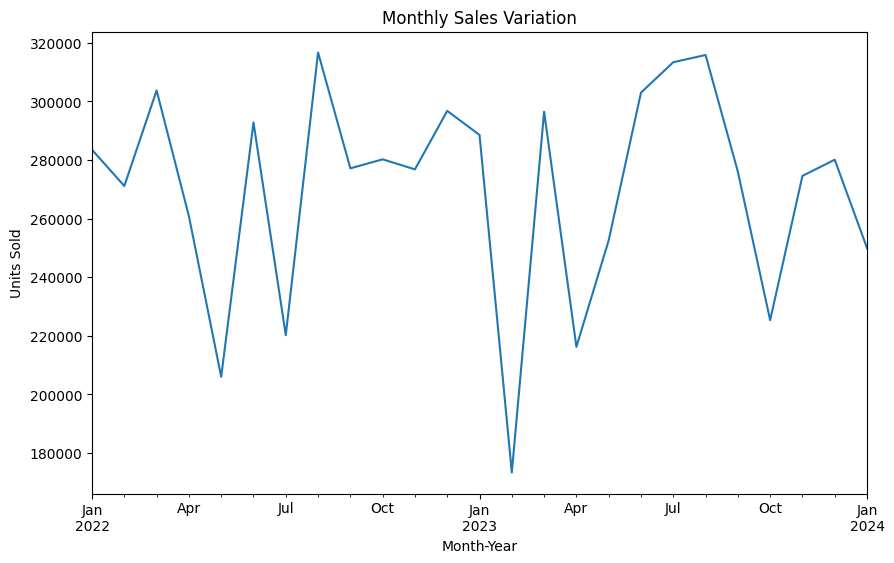

In [16]:
agente.responder_y_ejecutar("¿Cómo varían las ventas mensuales? ")

In [17]:
agente.responder_y_ejecutar(" Necesito todos los datos estadisticos que puedas generar, ejemplo: Media, Mediana, Moda, Coeficiente de variacion. ")


⏱ Tiempo de respuesta: 4.90 segundos

🧠 Código generado:
import pandas as pd

# Supongamos que df es tu DataFrame con los datos mencionados
estadisticos = {
    'Media': lambda col: col.mean(),
    'Mediana': lambda col: col.median(),
    'Moda': lambda col: col.mode()[0],
    'Desviacion Estandar': lambda col: col.std(),
    'Varianza': lambda col: col.var(),
    'Cuartil 1': lambda col: col.quantile(0.25),
    'Cuartil 3': lambda col: col.quantile(0.75),
    'Rango Intercuartil': lambda col: col.quantile(0.75) - col.quantile(0.25),
    'Coeficiente de Variacion': lambda col: (col.std() / col.mean()) * 100
}

resultados = {}
for columna, tipo in df.dtypes.items():
    if pd.api.types.is_numeric_dtype(tipo):
        resultados[columna] = {clave: valor(df[columna]) for clave, valor in estadisticos.items()}

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

                          Inventory Level   Units Sold  Units Ordered  \
Media                          301.062842    